In [1]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based.cec2014 import F12014, F112014
from mealpy import FloatVar, GA

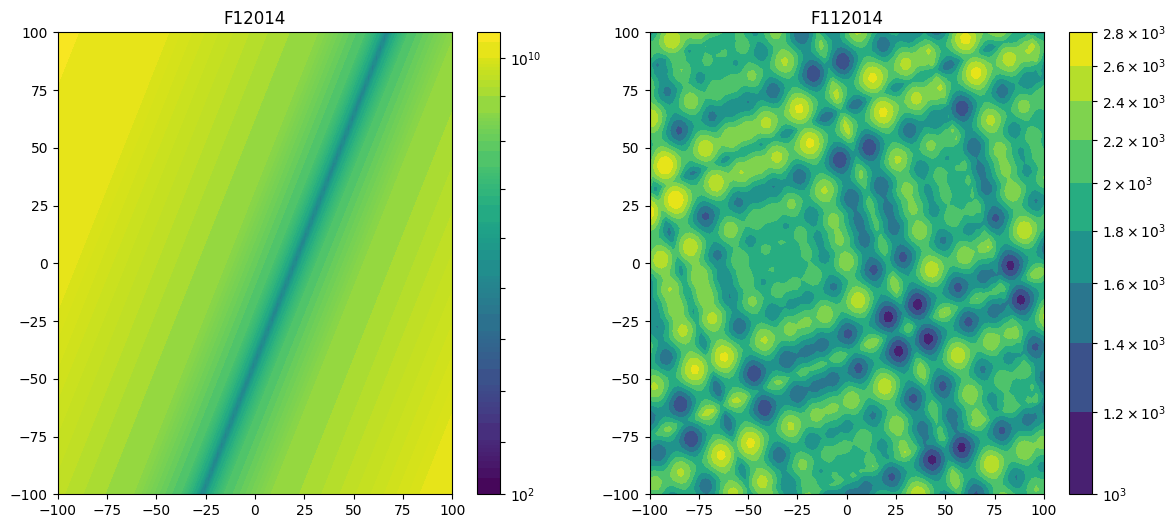

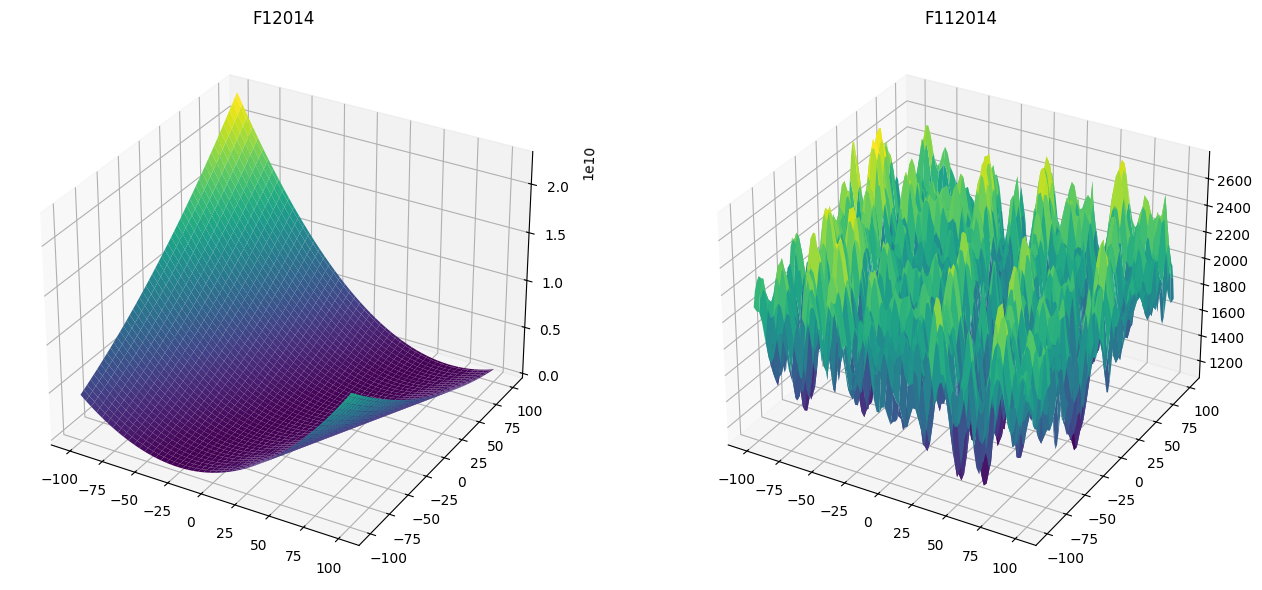

In [17]:
from matplotlib import ticker

f1_2d = F12014(ndim=2).evaluate
f11_2d = F112014(ndim=2).evaluate

# F12014
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z1 = np.array(
    [f1_2d(np.array([xx, yy])) for xx, yy in zip(np.ravel(X), np.ravel(Y))]
).reshape(X.shape)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z1, levels=50, cmap="viridis", locator=ticker.LogLocator(numticks=10, subs="all"))
plt.colorbar()
plt.title("F12014")

# F112014
Z2 = np.array(
    [f11_2d(np.array([xx, yy])) for xx, yy in zip(np.ravel(X), np.ravel(Y))]
).reshape(X.shape)

plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z2, levels=50, cmap="viridis", locator=ticker.LogLocator(numticks=10, subs="all"))
plt.colorbar()
plt.title("F112014")

# 3D
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(X, Y, Z1, cmap="viridis")
ax1.set_title("F12014")

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot_surface(X, Y, Z2, cmap="viridis")
ax2.set_title("F112014")

plt.tight_layout()
plt.show()

In [59]:
ndim = 10

f1 = F12014(ndim=ndim).evaluate
f11 = F112014(ndim=ndim).evaluate

def experiment(f, pop=50, elite_best=0.1, elite_worst=0.3):
    problem_dict = {
        "obj_func": f,
        "bounds": FloatVar(lb=(-100.0,) * ndim, ub=(100.0,) * ndim),
        "minmax": "min",
        "log_to": "None",
        "save_population": True,
    }

    model = GA.EliteSingleGA(
        epoch=100,
        pop_size=pop,
        selection="tournament",
        crossover="uniform",
        elite_best=elite_best,
        elite_worst=elite_worst,
    )

    best1 = model.solve(problem_dict)
    return best1, model

# Run experiments
funcs = [{"name": "f1", "ref": f1}, {"name": "f11", "ref": f11}]
pop_sizes = [50, 100, 150] #, 200]
elite_best_values = [0.1, 0.2, 0.3]
elite_worst_values = [0.1, 0.3, 0.4]
iterations = 10
results = []

for f in funcs:
    for pop in pop_sizes:
        for elite_best in elite_best_values:
            for elite_worst in elite_worst_values:
                results.append({
                    "function": f["name"],
                    "population": pop,
                    "elite_best": elite_best,
                    "elite_worst": elite_worst,
                    "iterations": []
                })
                for _ in range(iterations):
                    best, model = experiment(f["ref"], pop, elite_best, elite_worst)
                    results[-1]["iterations"].append({
                        "global_fitness_history": model.history.list_global_best_fit,
                    })

results

[{'function': 'f1',
  'population': 50,
  'elite_best': 0.1,
  'elite_worst': 0.1,
  'iterations': [{'global_fitness_history': [np.float64(295219011.3987223),
     np.float64(126757654.36646321),
     np.float64(126757654.36646321),
     np.float64(126757654.36646321),
     np.float64(126757654.36646321),
     np.float64(73079339.61051355),
     np.float64(59343601.94400762),
     np.float64(59343601.94400762),
     np.float64(34534511.92513423),
     np.float64(34534511.92513423),
     np.float64(34534511.92513423),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.898608636),
     np.float64(20606875.89860863

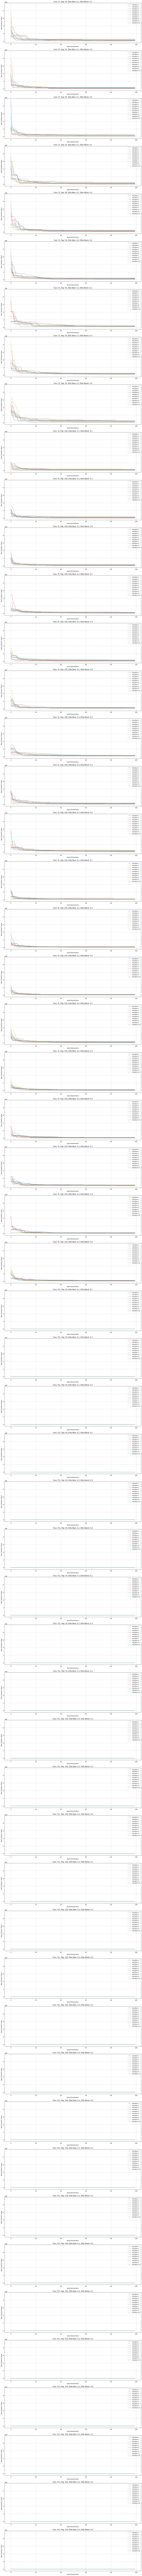

In [60]:
n_rows = len(results)
n_cols = len(results[0]["iterations"][0]["global_fitness_history"])

fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(15, n_rows * 5), sharey=True)

for i, result in enumerate(results):
    ax = axes[i]
    for j in range(iterations):
        ax.plot(result["iterations"][j]["global_fitness_history"], label=f'Iteration {j+1}', alpha=0.7)
    
    ax.set_title(f'Func: {result["function"]}, Pop: {result["population"]}, Elite Best: {result["elite_best"]}, Elite Worst: {result["elite_worst"]}')
    ax.set_xlabel('Epoch/Generation')
    ax.set_ylabel('Best Solution Value')
    ax.grid(True, which="both", ls="--")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()
